In [9]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/petervitale910/eds220-hwk2-petervitale


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

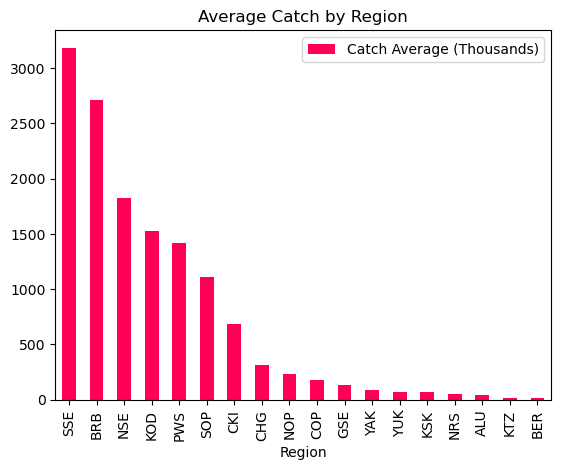

In [1]:
# FINAL CODE

# Import the packages
import pandas as pd
import matplotlib.pyplot as plt

# Read in the csv

catch_data = pd.read_csv('data/salmon_data.csv') # When unsure, use pwd to verify you are in the right place

# Manipulate the data to prepare for plotting
catch_data.loc[400, 'Catch'] = 1 # Change the values that were imported incorrectly

# Transform 'Catch' column into int64, take a mean, and reset the index
avg_region = catch_data.astype({'Catch':'int64'}).groupby('Region')['Catch'].mean().reset_index() # I reset the index so it stayed a dataframe

# Plot the figure

avg_region.sort_values(by='Catch', ascending = False).plot( # Sort the data before plotting
    kind = 'bar', # Bar plot 
    x = 'Region',
    y = 'Catch',
    color = '#FF0054'  # Nice pink color 
)
plt.legend(['Catch Average (Thousands)']) # Edit legend title 
plt.title("Average Catch by Region") # Edit title
plt.show() # Remove any text and only show the plot

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [4]:
# a.
# Import pandas

import pandas as pd

# Read in the csv

catch_data = pd.read_csv('data/salmon_data.csv') # When unsure, use pwd to verify you are in the right place

# Look at the head of the df

catch_data.head(7) # I usually like a bit more than the base 5

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0
5,SSE,1891,NaN,Chinook,0
6,SSE,1892,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b.
print(f'These data have {catch_data.shape[0]} rows and {catch_data.shape[1]} columns') # Use f strings for pretty print
print()
print(f'The data types are:\n {catch_data.dtypes}') # \n is pretty cool


These data have 8540 rows and 5 columns

The data types are:
 Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

*The cell above is not letting me edit*

I decided to take the shape as to get a grasp on the data size, and get contextual clues for filtered datasets. I also took the types of the data to examine in what format `Year` was stored.


<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [20]:
notes_unique = catch_data.notesRegCode.unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [21]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [51]:
catch_data = catch_data.drop('notesRegCode', axis = 1) # Axis is needed

In [25]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


As I saw earlier we may want to change certain data types. I would change the catch to a number (int64)

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [27]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [38]:
catch_I = catch_data[catch_data['Catch'] == 'I'] # Find where catch is equal to I 
catch_I 

,Region,Year,Species,Catch,"(400, Catch)"


In [31]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [5]:


catch_1 = catch_data.loc[400, 'Catch'] = 1 # This changes my original df as well 

# Print catch_1
catch_1

1

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [11]:
catch_data = catch_data.astype({'Catch':'int64'}) # Here I use almost a dictionary method to call the column I want 

catch_column_type = catch_data['Catch'].dtypes
catch_column_type

dtype('int64')

In [12]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [21]:
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index() # Here I reset index to make it easier to plot
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


In [18]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Figure size 700x400 with 0 Axes>

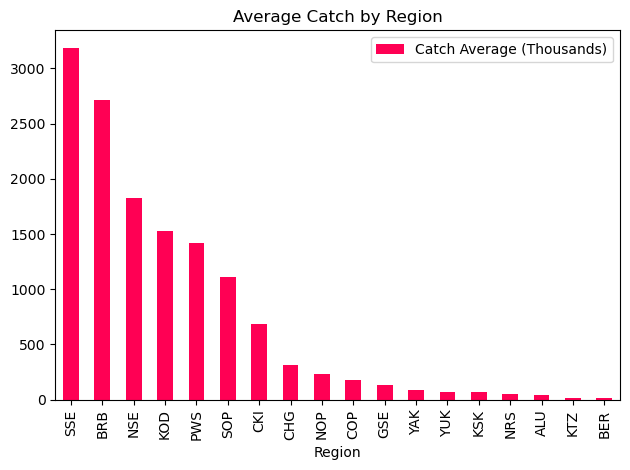

In [43]:
import matplotlib.pyplot as plt

avg_region.sort_values(by='Catch', ascending = False).plot( # Sort the data before plotting
    kind = 'bar', # Bar plot 
    x = 'Region',
    y = 'Catch',
    color = '#FF0054'  # Nice pink color 
)
plt.legend(['Catch Average (Thousands)']) # Edit legend title 
plt.title("Average Catch by Region") # Edit title

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The top three regions for catches were: Southern Southeast Alaska, Bristol Bay Management Area, and Northern Southeast Alaska. There is a very big jump between Northern Southeast Alaska and Bristol Bay, with close to 1,000,000 catches separating the two. The low end does not see much variation or catches, with the bottom 11 regions all reporting less than 500,000 catches. 

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()